# Simple Linear Regression

## LinearRegression() method

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./data_pd/Diamonds Prices2022.csv")
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
# import seaborn as sns
# from sklearn.datasets import fetch_california_housing
# data = fetch_california_housing(as_frame=True)
# df = data.frame

# X = df[['MedInc']].values
# y = df['MedHouseVal'].values

In [4]:
# Extract relevant columns
X = df[['carat']].values    # Predictor
y = df['price'].values    # Target


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Make prediction on the test set
y_pred = model.predict(X_test)


In [8]:
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [9]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 7751.989281984766
 Intercept: -2247.4241678814396

Model Performance Metrics:
 Mean Squared Error (MSE): 2315697.6330710365
 Root Mean Squared Error (RMSE): 1521.7416446529405
 R^2 Score (Explained Variance): 0.8516827702293546


In [10]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 559.00, Predicted: -386.95
 Actual: 8403.00, Predicted: 7132.48
 Actual: 1238.00, Predicted: 1628.57
 Actual: 1243.00, Predicted: 1628.57
 Actual: 6901.00, Predicted: 9768.16
 Actual: 3011.00, Predicted: 5504.57
 Actual: 1766.00, Predicted: 1706.09
 Actual: 12958.00, Predicted: 9535.60
 Actual: 2103.00, Predicted: 2171.21
 Actual: 4789.00, Predicted: 6589.84
 Actual: 14618.00, Predicted: 9380.56
 Actual: 702.00, Predicted: 233.21
 Actual: 958.00, Predicted: 155.69
 Actual: 2401.00, Predicted: 3178.97
 Actual: 1149.00, Predicted: 2481.29
 Actual: 961.00, Predicted: 930.89
 Actual: 2958.00, Predicted: 5349.53
 Actual: 666.00, Predicted: 310.73
 Actual: 2665.00, Predicted: 3721.61
 Actual: 9875.00, Predicted: 9923.20
 Actual: 1020.00, Predicted: 233.21
 Actual: 2553.00, Predicted: 3178.97
 Actual: 625.00, Predicted: 155.69
 Actual: 10367.00, Predicted: 7054.96
 Actual: 3854.00, Predicted: 4806.89
 Actual: 1415.00, Predicted: 1628.57
 Actual:

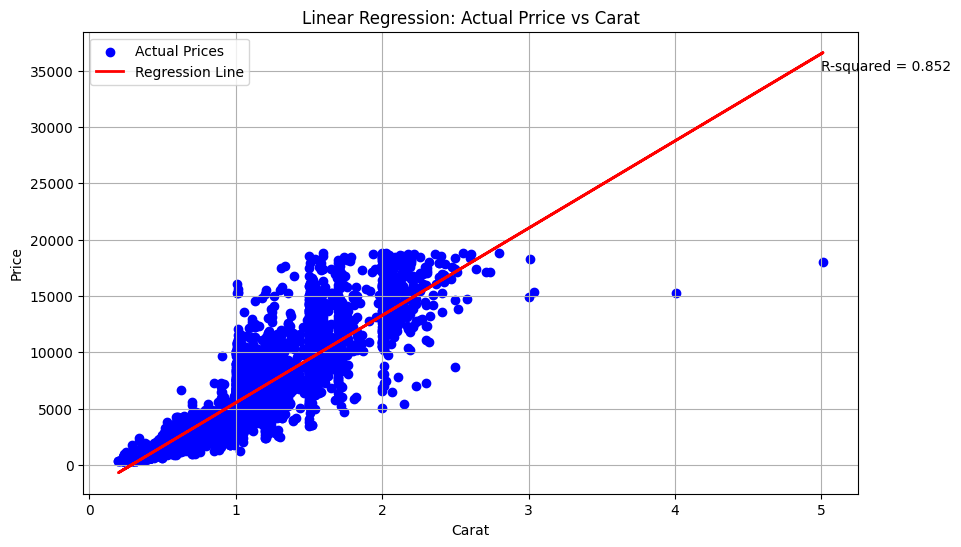

In [11]:
# Plot the linear Regression line and actual values
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Actual Prrice vs Carat")
plt.annotate("R-squared = {:.3f}".format(r2_score(y_test, y_pred)), (5, 35000))
plt.legend()
plt.grid()
plt.show()

## OLS() Ordinary Least Squares regression Method

In [12]:
import statsmodels.api as sm

In [13]:
# Add a constant to the predictor for the intercept term
X = sm.add_constant(X)

In [14]:
# Fit the OLS regression model
ols_model = sm.OLS(y_train, X_train).fit()

In [15]:
# Print the summary of the OLS regression
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          3.212e+05
Date:                Fri, 13 Dec 2024   Prob (F-statistic):                        0.00
Time:                        14:24:54   Log-Likelihood:                     -3.8778e+05
No. Observations:               43154   AIC:                                  7.756e+05
Df Residuals:                   43153   BIC:                                  7.756e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
# Make prediction on the test set
y_pred = ols_model.predict(X_test)

In [17]:
# Calculate Mean Squared Error and R-squared manually for the test data


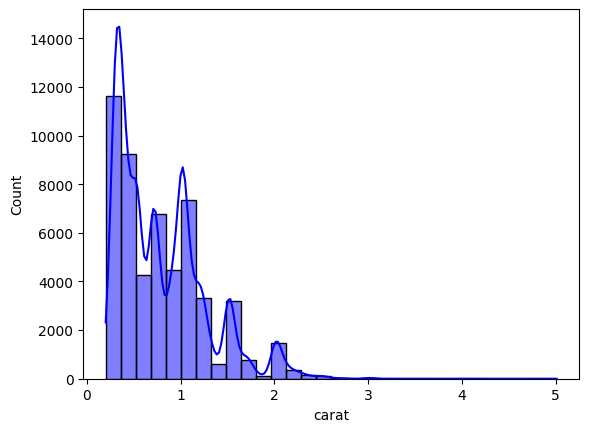

In [18]:
import seaborn as sns
sns.histplot(df['carat'], bins=30, kde=True, color='blue')
plt.show()

# Multiple Linear Regression
    - included the scaling and encoding

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv("./data_pd/insurance.csv")


In [21]:
# # One hot encoding the gender column
# df = pd.get_dummies(df, columns=['gender'], drop_first=True)
# df.head()

# # Label Encode the gender column
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])       # Encode gender as 0 and 1
# df.head()

# # Frequency Encoding
# gender_counts = df['gender'].value_counts(normalize=True)       # Calculate frequency
# gender_counts
# df['gender']  =df['gender'].map(gender_counts)      # Replace category with frequency
# df.head()

In [22]:
# # Extract relevant columns
# X = df[['age', 'bmi']].values
# y = df['charges'].values
# X

# # Extract relevant columns
# X = df[['age', 'bmi', 'gender_male']].values      # "gender_male" will be formed after one hot encoding the gender column
# y = df['charges'].values
# X

In [23]:
# # Apply StandardScaler to the predictors
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# print(X_scaled)

# Apply MinMaxScaler to the predictors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.         0.00623701]
 [0.         0.002079  ]
 [0.         0.00623701]
 ...
 [0.         0.10602911]
 [0.         0.10602911]
 [0.         0.1039501 ]]


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [25]:
# Fit the linear regresion model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Make preditction on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 0.0
 Intercept: -2247.4241678814487

Model Performance Metrics:
 Mean Squared Error (MSE): 2315697.6330710375
 Root Mean Squared Error (RMSE): 1521.741644652941
 R^2 Score (Explained Variance): 0.8516827702293546


In [29]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 559.00, Predicted: -386.95
 Actual: 8403.00, Predicted: 7132.48
 Actual: 1238.00, Predicted: 1628.57
 Actual: 1243.00, Predicted: 1628.57
 Actual: 6901.00, Predicted: 9768.16
 Actual: 3011.00, Predicted: 5504.57
 Actual: 1766.00, Predicted: 1706.09
 Actual: 12958.00, Predicted: 9535.60
 Actual: 2103.00, Predicted: 2171.21
 Actual: 4789.00, Predicted: 6589.84
 Actual: 14618.00, Predicted: 9380.56
 Actual: 702.00, Predicted: 233.21
 Actual: 958.00, Predicted: 155.69
 Actual: 2401.00, Predicted: 3178.97
 Actual: 1149.00, Predicted: 2481.29
 Actual: 961.00, Predicted: 930.89
 Actual: 2958.00, Predicted: 5349.53
 Actual: 666.00, Predicted: 310.73
 Actual: 2665.00, Predicted: 3721.61
 Actual: 9875.00, Predicted: 9923.20
 Actual: 1020.00, Predicted: 233.21
 Actual: 2553.00, Predicted: 3178.97
 Actual: 625.00, Predicted: 155.69
 Actual: 10367.00, Predicted: 7054.96
 Actual: 3854.00, Predicted: 4806.89
 Actual: 1415.00, Predicted: 1628.57
 Actual:

# Exercise on Linear Regression

## indian_housing_pune dataset

- Q. Perform Simple Linear regression on indian_housing_pune dataset between house size and price columns

In [30]:
housing_df = pd.read_csv("./data_pd/Indian_housing_Pune_data.csv")
housing_df.head()

house_type   house_size       location  city   latitude  \
0          2 BHK Apartment     906 sq ft       Lohegaon  Pune  18.605820   
1          1 BHK Apartment     650 sq ft    Anand Nagar  Pune  18.474377   
2    1 RK Studio Apartment     350 sq ft        Wagholi  Pune  18.580336   
3          3 BHK Apartment   1,500 sq ft     Sangamvadi  Pune  18.541786   
4  5 BHK Independent House   5,000 sq ft  Wadgaon Sheri  Pune  18.560164   

   longitude   price currency  numBathrooms  numBalconies isNegotiable  \
0  73.912407   12000      INR           2.0           NaN          NaN   
1  73.820549   11000      INR           1.0           NaN          NaN   
2  73.980507    4500      INR           1.0           NaN          NaN   
3  73.882454   35000      INR           2.0           NaN          NaN   
4  73.924927  110000      INR           5.0           NaN          NaN   

   priceSqFt    verificationDate  \
0        NaN  Posted 3 years ago   
1        NaN  Posted 2 years ago   
2        NaN  Posted 2 years ago   
3        NaN  Posted 3 years ago   
4        NaN  Posted 3 years ago   

                                         description SecurityDeposit  \
0  A spacious 2 bhk multistorey apartment is avai...      No Deposit   
1  It has a built-up area of 650 sqft and is avai...      No Deposit   
2  This spacious 1 rk independent house is availa...      No Deposit   
3  Furnishings include 1 tv, 1 refrigerator, 1 so...      No Deposit   
4  Itâs a 5 bhk independent house situated in W...      No Deposit   

           Status  
0     Unfurnished  
1  Semi-Furnished  
2     Unfurnished  
3       Furnished  
4     Unfurnished

In [31]:
housing_df['house_size'] = housing_df['house_size'].str.replace(" sq ft", "")
housing_df['house_size'] = housing_df['house_size'].str.replace(",", "").astype(int)

In [32]:
# Extract relevant columns
X = housing_df[['house_size']].values    # Predictor
y = housing_df['price'].values    # Target


In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [34]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 25.895940043649098
 Intercept: -4530.245496776624

Model Performance Metrics:
 Mean Squared Error (MSE): 146703158.61478436
 Root Mean Squared Error (RMSE): 12112.10793440945
 R^2 Score (Explained Variance): 0.41769537139188684


In [35]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 17000.00, Predicted: 30636.44
 Actual: 12500.00, Predicted: 13596.91
 Actual: 45000.00, Predicted: 31724.07
 Actual: 13000.00, Predicted: 13078.99
 Actual: 9000.00, Predicted: 13130.79
 Actual: 23000.00, Predicted: 24473.21
 Actual: 22000.00, Predicted: 26026.96
 Actual: 27000.00, Predicted: 25431.36
 Actual: 100000.00, Predicted: 70567.98
 Actual: 25000.00, Predicted: 38301.64
 Actual: 20000.00, Predicted: 19397.60
 Actual: 25000.00, Predicted: 30066.73
 Actual: 7000.00, Predicted: 18776.10
 Actual: 15000.00, Predicted: 13337.95
 Actual: 29000.00, Predicted: 21365.69
 Actual: 25000.00, Predicted: 17481.30
 Actual: 13000.00, Predicted: 8417.72
 Actual: 75000.00, Predicted: 65388.79
 Actual: 15000.00, Predicted: 27943.26
 Actual: 16000.00, Predicted: 13078.99
 Actual: 22000.00, Predicted: 9712.52
 Actual: 13000.00, Predicted: 10178.65
 Actual: 27000.00, Predicted: 10230.44
 Actual: 15000.00, Predicted: 24343.73
 Actual: 18500.00, Predicted

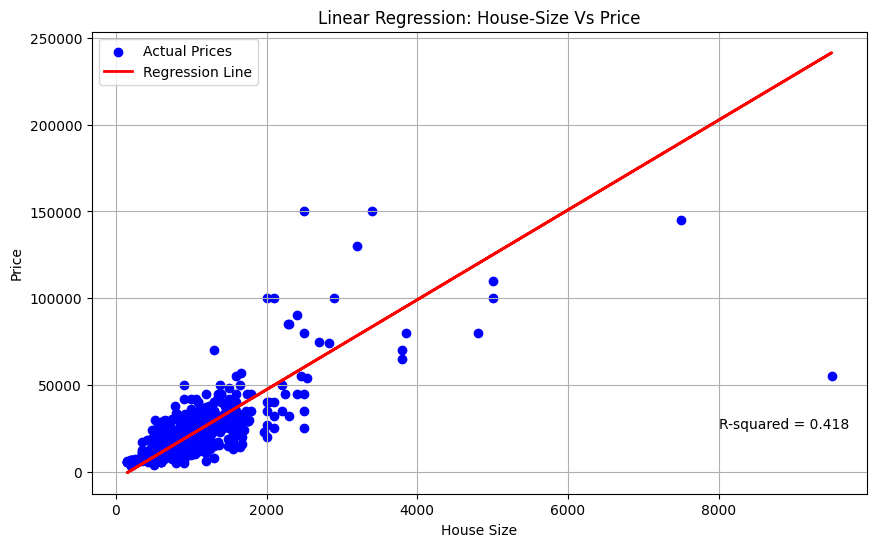

In [36]:
# Plot the linear Regression line and actual values
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("Linear Regression: House-Size Vs Price")
plt.annotate("R-squared = {:.3f}".format(r2_score(y_test, y_pred)), (8000, 25000))
plt.legend()
plt.grid()
plt.show()

## Advertising dataset

- Q. Perform Multiple linear regression on advertising dataset to predict sales using money spent on TV, radio, newspaper advertising

In [37]:
advertise_df = pd.read_csv("./data_pd/advertising.csv")
advertise_df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [38]:
# Extract relevant columns
X = advertise_df[['TV', 'Radio', 'Newspaper']].values    # Predictor
y = advertise_df['Sales'].values    # Target


In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [40]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 0.044729517468716326
 Intercept: 2.979067338122631

Model Performance Metrics:
 Mean Squared Error (MSE): 3.174097353976104
 Root Mean Squared Error (RMSE): 1.7815996615334502
 R^2 Score (Explained Variance): 0.899438024100912


## Tips dataset

- Q. Perform multiple linear regression on tips dataset. Use total bill, smoker, and day as predictors and tip as the predicted value. Use any one encoding method to encode the smoker and day columns before pr=erforming the regression operation

In [41]:
tips_df = pd.read_csv("./data_pd/tips.csv")
tips_df.head()
tips_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [42]:
tips_df = tips_df[['total_bill', 'smoker','day','tip']]

In [43]:
# One hot encoding the gender column
tips_df = pd.get_dummies(tips_df, columns=['smoker','day'], drop_first=True)

tips_df.head()


total_bill   tip  smoker_Yes  day_Sat  day_Sun  day_Thur
0       16.99  1.01       False    False     True     False
1       10.34  1.66       False    False     True     False
2       21.01  3.50       False    False     True     False
3       23.68  3.31       False    False     True     False
4       24.59  3.61       False    False     True     False

In [44]:
# Extract relevant columns
X = tips_df.drop(columns='tip').values      
y = tips_df['tip'].values
X

array([[16.99, False, False, True, False],
       [10.34, False, False, True, False],
       [21.01, False, False, True, False],
       ...,
       [22.67, True, True, False, False],
       [17.82, False, True, False, False],
       [18.78, False, False, False, True]], dtype=object)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# Fit the linear regresion model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Make preditction on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [46]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 0.1089049387479865
 Intercept: 1.0733476527583186

Model Performance Metrics:
 Mean Squared Error (MSE): 0.6475620146605893
 Root Mean Squared Error (RMSE): 0.8047123800840827
 R^2 Score (Explained Variance): 0.4819385123430485


# Logistic Regression

## Diabetes Dataset

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [48]:
df = pd.read_csv("./data_pd/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [49]:
# Split the dataset into predictor variable X and the target variable y
X = df.drop("Outcome", axis=1)
y = df['Outcome']

In [50]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

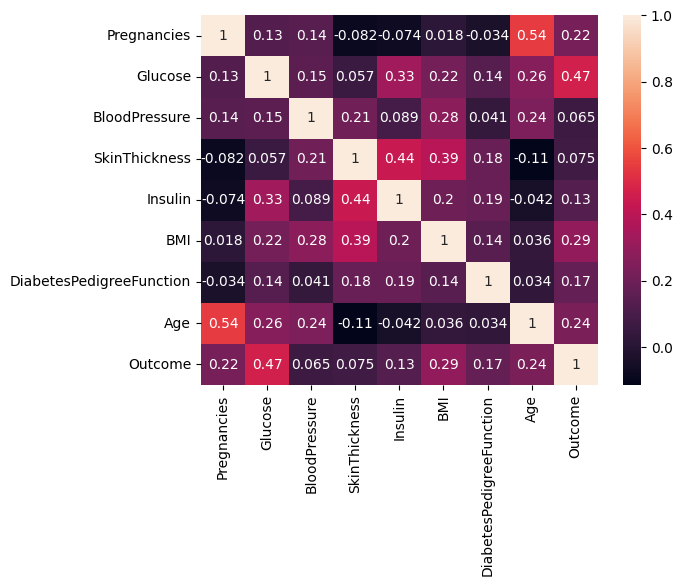

In [51]:
sns.heatmap(df.corr(), annot=True)

In [52]:
# Split data into training ad testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [53]:
# Create and train a logistic regression model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)


In [55]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0

In [56]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.7749
Train Accuracy: 0.7747


In [57]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat


Confusion Matrix


array([[132,  14],
       [ 38,  47]], dtype=int64)

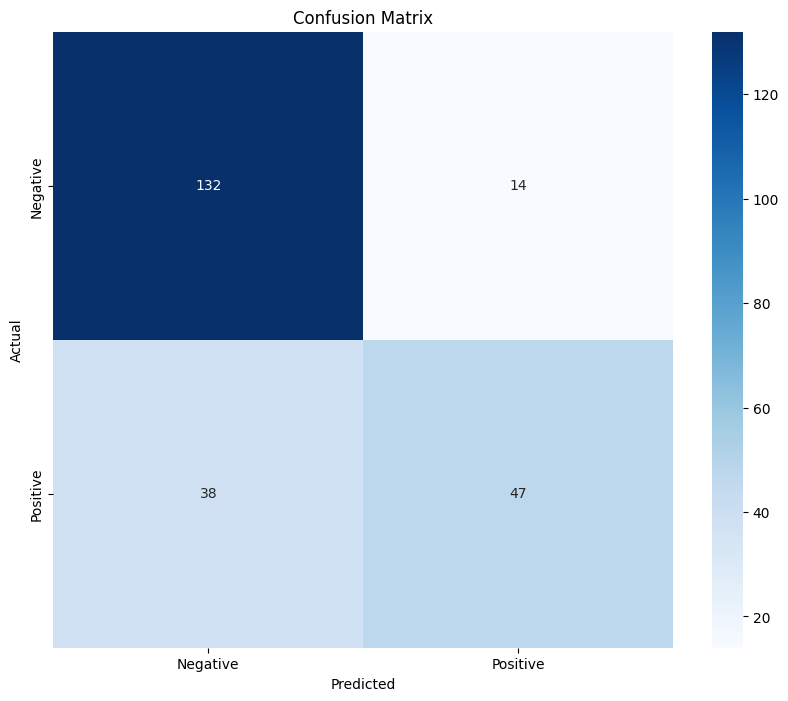

In [58]:

# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [60]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.5529
precision: 0.7705
Specificity: 0.9041
Accuracy: 0.7749


In [61]:
# Another Technique
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extract TP ,TN, FP, FN from the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

# Calcualte accuracy, precision, recall and F1 score
accuracy = accuracy_score(y_test, y_test_prediction)
precision = precision_score(y_test, y_test_prediction)
recall = recall_score(y_test, y_test_prediction)
f1 = f1_score(y_test, y_test_prediction)

# Print the results
print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Recall: 0.5529
precision: 0.7705
Recall: 0.5529
F1-Score: 0.6438


## Titanic Dataset

In [62]:
titanic_df = pd.read_csv("./data_pd/tested.xls")
titanic_df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [63]:
# titanic_df['Age'].unique()
titanic_df['Age'].dropna()
titanic_df = titanic_df.dropna(subset=['Age'])

In [64]:
titanic_df['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [65]:
# Split the dataset into predictor variable X and the target variable y
X = titanic_df[['Age']]
y = titanic_df['Survived']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [67]:
# Create and train a logistic regression model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [68]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)

In [69]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

Actual  Predicted
185       0          0
184       1          0
193       0          0
405       0          0
131       0          0

In [70]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.5522
Train Accuracy: 0.6340


In [71]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat


Confusion Matrix


array([[37,  0],
       [30,  0]], dtype=int64)

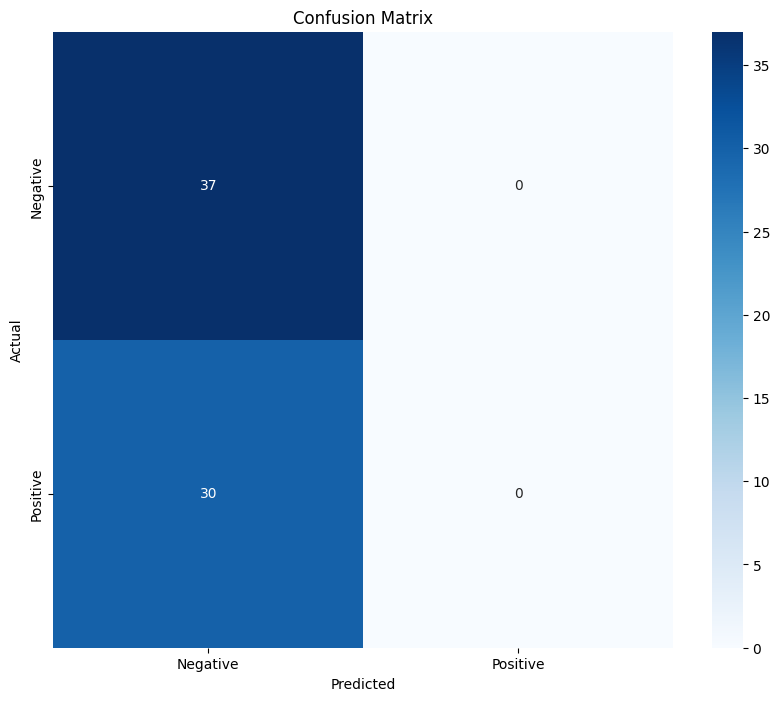

In [72]:
# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        37
           1       0.00      0.00      0.00        30

    accuracy                           0.55        67
   macro avg       0.28      0.50      0.36        67
weighted avg       0.30      0.55      0.39        67



c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [74]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.0000
precision: nan
Specificity: 1.0000
Accuracy: 0.5522


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_9344\558949548.py:4: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


<Axes: >

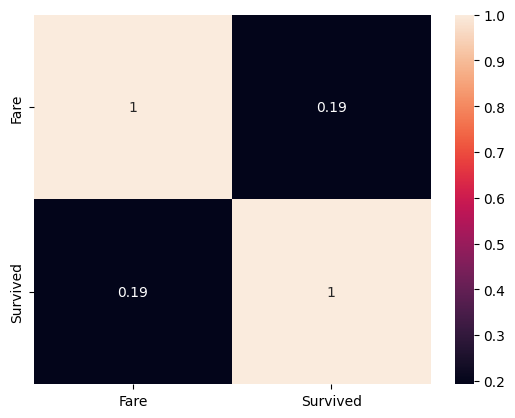

In [75]:
sns.heatmap(titanic_df[['Fare', 'Survived']].corr(), annot=True)

# Naive Bayes Classifier


## Titanic Dataset
    - Find who survived given that they were female and their passenger class was 3 using naive bayes algorithm
    - Bayes Theorem: P(survived | pclass=3, gender =female) = P(pclass=3, gender=female | survived) * P(survived) / P(pcalss=3, gender=female)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("./data_pd/tested.xls")

In [78]:
# One hot encode the gender column
df = pd.get_dummies(df, columns=['Sex'])

# Now the 'Sex' column will be replaced with two new columns:
# Sex_male and Sex_female

In [79]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name   Age  SibSp  Parch   Ticket  \
0                              Kelly, Mr. James  34.5      0      0   330911   
1              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   363272   
2                     Myles, Mr. Thomas Francis  62.0      0      0   240276   
3                              Wirz, Mr. Albert  27.0      0      0   315154   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1  3101298   

      Fare Cabin Embarked  Sex_female  Sex_male  
0   7.8292   NaN        Q       False      True  
1   7.0000   NaN        S        True     False  
2   9.6875   NaN        Q       False      True  
3   8.6625   NaN        S       False      True  
4  12.2875   NaN        S        True     False

In [80]:
X = df[['Pclass', 'Sex_female']]
y = df['Survived']

In [81]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [83]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

In [84]:
# Print the result dataframe
results

Actual  Prediction
321       0           0
324       1           1
388       0           0
56        0           0
153       1           1
..      ...         ...
57        0           0
126       0           0
24        1           1
17        0           0
66        1           1

[84 rows x 2 columns]

In [85]:
# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [86]:
# Predict the probability of survival for a female passenger in class 3 
new_passenger = [[3,1]]     # 3 for pclass and 1 for gender == female i.e true
predicted_probability = nb.predict_proba(new_passenger)[0][1]

# It might return [0.3,0.7]
# [p(did not survive), p(survived)]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [87]:
# evaluate the model with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix


Confusion Matrix


array([[50,  0],
       [ 0, 34]], dtype=int64)

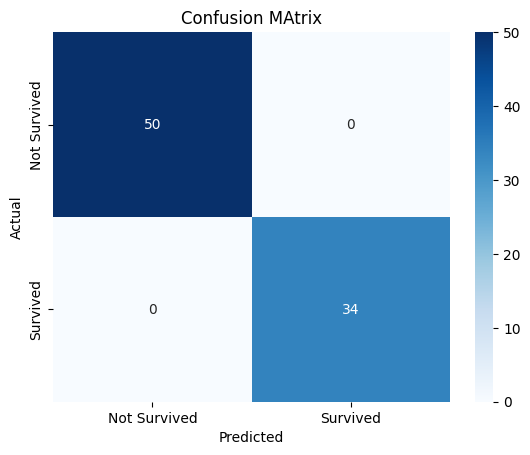

In [88]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion MAtrix')
plt.show()

In [89]:
# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print("\n Classification Report")
class_report


 Classification Report


'              precision    recall  f1-score   support\n\nNot Survived       1.00      1.00      1.00        50\n    Survived       1.00      1.00      1.00        34\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

## Heart Dataset

    - Do Naive Bayes classification for the Heart.csv dataset to predict if the patient has heart disease. Evaluate the model's accuracy using results on the test set and using confusion matrix. 
    Predict for a patient having 
    Age = 50, 
    Gender = Male, 
    Resting BP = 150 
    Cholestrol =200, 
    MaxHR = 130. 
    Use only these columns as a predicting features.
    Then perform same using Logistic regression and compare results 

In [90]:
heart_df = pd.read_csv('./data_pd/Heart2.csv')
heart_df.head()

Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40      M           ATA        140          289          0     Normal   
1   49      F           NAP        160          180          0     Normal   
2   37      M           ATA        130          283          0         ST   
3   48      F           ASY        138          214          0     Normal   
4   54      M           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [91]:
# One hot encode the gender column
heart_df = pd.get_dummies(heart_df, columns=['Gender'])
heart_df.head()

Age ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40           ATA        140          289          0     Normal    172   
1   49           NAP        160          180          0     Normal    156   
2   37           ATA        130          283          0         ST     98   
3   48           ASY        138          214          0     Normal    108   
4   54           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Gender_F  Gender_M  
0              N      0.0       Up             0     False      True  
1              N      1.0     Flat             1      True     False  
2              N      0.0       Up             0     False      True  
3              Y      1.5     Flat             1      True     False  
4              N      0.0       Up             0     False      True

In [92]:
X = heart_df[['Age', 'Gender_M', 'RestingBP', 'Cholesterol', 'MaxHR']]
y = heart_df['HeartDisease']

In [93]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [95]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

Actual  Prediction
668       0           0
30        1           1
377       1           1
535       1           1
807       0           0
..      ...         ...
211       1           0
745       1           0
584       1           1
878       0           0
451       1           1

[184 rows x 2 columns]

In [96]:

# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7283


In [97]:
# Predict the probability of Heart Disease for a male patient 
new_patient = [[50,True, 150, 200, 130]]     
predicted_probability = nb.predict_proba(new_patient)[0][1]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [98]:
predicted_probability

0.6797579278467842

In [99]:
# evaluate the model with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix


Confusion Matrix


array([[53, 24],
       [26, 81]], dtype=int64)

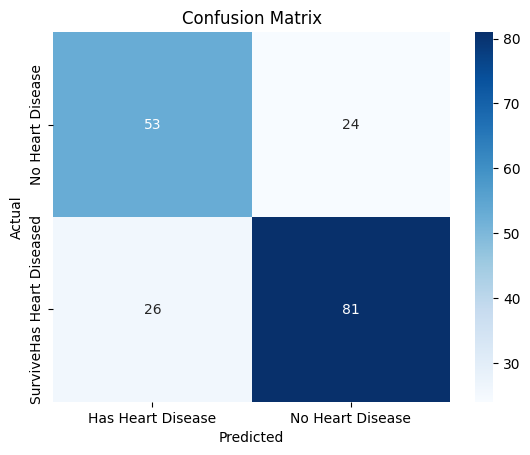

In [100]:

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Has Heart Disease', 'No Heart Disease'], yticklabels=['No Heart Disease', 'SurviveHas Heart Diseased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Has Heart Disease'])
print("\n Classification Report")
print(class_report)


 Classification Report
                   precision    recall  f1-score   support

 No Heart Disease       0.67      0.69      0.68        77
Has Heart Disease       0.77      0.76      0.76       107

         accuracy                           0.73       184
        macro avg       0.72      0.72      0.72       184
     weighted avg       0.73      0.73      0.73       184



    - now using Logistic regression

In [102]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [103]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)

In [104]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

Actual  Predicted
668       0          0
30        1          0
377       1          1
535       1          1
807       0          0

In [105]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.7011
Train Accuracy: 0.7316


In [106]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat



Confusion Matrix


array([[51, 26],
       [29, 78]], dtype=int64)

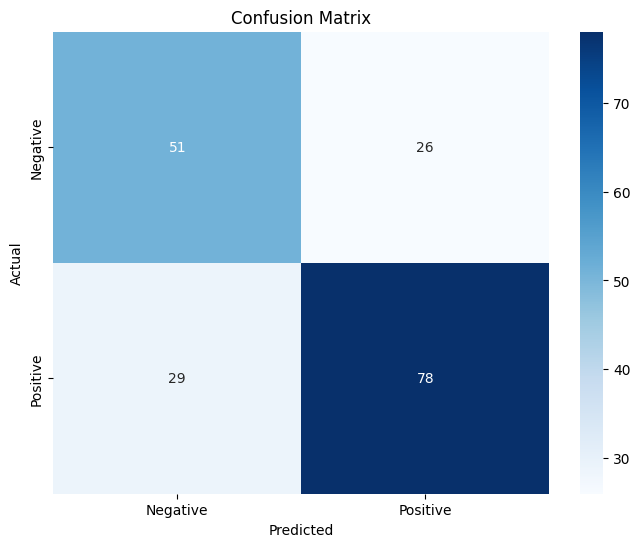

In [107]:
# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [108]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        77
           1       0.75      0.73      0.74       107

    accuracy                           0.70       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.70      0.70      0.70       184



In [109]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.7290
precision: 0.7500
Specificity: 0.6623
Accuracy: 0.7011


## Cricket Dataset

    - Use naive Bayes to find the probability of India winning the next match against Australia when playing abroad

In [110]:
df1 = pd.read_csv("./data_pd/Men ODI Team Match Results2 - 20th Century.csv")
df2 = pd.read_csv("./data_pd/Men ODI Team Match Results2 - 21st Century.csv")
cricket_df = pd.concat([df1, df2])

In [111]:
cricket_df.tail()

Result     Margin                      Match Home/Away   Ground  \
5165   Lost  3 wickets     Afghanistan v Pakistan      Home    Leeds   
5166   Lost    23 runs  Afghanistan v West Indies      Home    Leeds   
5167   Lost  7 wickets  Afghanistan v West Indies      Home  Lucknow   
5168   Lost    47 runs  Afghanistan v West Indies      Home  Lucknow   
5169   Lost  5 wickets  Afghanistan v West Indies      Home  Lucknow   

      Match Date Match Month  Match Year Match Period  Matches      Country  
5165  2019/06/29         Jun        2019     Jun 2019        1  Afghanistan  
5166  2019/07/04         Jul        2019     Jul 2019        1  Afghanistan  
5167  2019/11/06         Nov        2019     Nov 2019        1  Afghanistan  
5168  2019/11/09         Nov        2019     Nov 2019        1  Afghanistan  
5169  2019/11/11         Nov        2019     Nov 2019        1  Afghanistan

In [112]:
cricket_df['Result'].value_counts()

Result
Won     3999
Lost    3908
N/R      291
Aban     207
Tied      76
Canc      60
Name: count, dtype: int64

In [113]:
cricket_df['Result'] = cricket_df['Result'].map(lambda x: 'Won' if x == 'Won' else 'Lost')
cricket_df['Result'].value_counts()

Result
Lost    4542
Won     3999
Name: count, dtype: int64

In [114]:
filtered_df = cricket_df[cricket_df['Match'].str.contains('India', case=False) & cricket_df['Match'].str.contains('Australia', case=False)]
filtered_df

Result      Margin              Match Home/Away     Ground  Match Date  \
368    Lost     66 runs  Australia v India      Home  Melbourne  1980/12/06   
370     Won   9 wickets  Australia v India      Home     Sydney  1980/12/18   
371     Won   9 wickets  Australia v India      Home     Sydney  1981/01/08   
372     Won   7 wickets  Australia v India      Home  Melbourne  1981/01/11   
374     Won     27 runs  Australia v India      Home     Sydney  1981/01/15   
...     ...         ...                ...       ...        ...         ...   
2745   Lost     35 runs  India v Australia      Home      Delhi  2019/03/13   
2747    Won     36 runs  Australia v India      Away   The Oval  2019/06/09   
2762   Lost  10 wickets  India v Australia      Home     Mumbai  2020/01/14   
2763    Won     36 runs  India v Australia      Home     Rajkot  2020/01/17   
2764    Won   7 wickets  India v Australia      Home  Bengaluru  2020/01/19   

     Match Month  Match Year Match Period  Matches    Country  
368          Dec        1980     Dec 1980        1  Australia  
370          Dec        1980     Dec 1980        1  Australia  
371          Jan        1981     Jan 1981        1  Australia  
372          Jan        1981     Jan 1981        1  Australia  
374          Jan        1981     Jan 1981        1  Australia  
...          ...         ...          ...      ...        ...  
2745         Mar        2019     Mar 2019        1      India  
2747         Jun        2019     Jun 2019        1      India  
2762         Jan        2020     Jan 2020        1      India  
2763         Jan        2020     Jan 2020        1      India  
2764         Jan        2020     Jan 2020        1      India  

[290 rows x 11 columns]

In [115]:
filtered_df = pd.get_dummies(filtered_df, columns=['Home/Away'])

In [116]:
filtered_df.head()

Result     Margin              Match     Ground  Match Date Match Month  \
368   Lost    66 runs  Australia v India  Melbourne  1980/12/06         Dec   
370    Won  9 wickets  Australia v India     Sydney  1980/12/18         Dec   
371    Won  9 wickets  Australia v India     Sydney  1981/01/08         Jan   
372    Won  7 wickets  Australia v India  Melbourne  1981/01/11         Jan   
374    Won    27 runs  Australia v India     Sydney  1981/01/15         Jan   

     Match Year Match Period  Matches    Country  Home/Away_Away  \
368        1980     Dec 1980        1  Australia           False   
370        1980     Dec 1980        1  Australia           False   
371        1981     Jan 1981        1  Australia           False   
372        1981     Jan 1981        1  Australia           False   
374        1981     Jan 1981        1  Australia           False   

     Home/Away_Home  
368            True  
370            True  
371            True  
372            True  
374            True

In [117]:
# # Label Encode the gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
filtered_df['Result'] = le.fit_transform(filtered_df['Result'])       # Encode gender as 0 and 1
filtered_df.head()

Result     Margin              Match     Ground  Match Date Match Month  \
368       0    66 runs  Australia v India  Melbourne  1980/12/06         Dec   
370       1  9 wickets  Australia v India     Sydney  1980/12/18         Dec   
371       1  9 wickets  Australia v India     Sydney  1981/01/08         Jan   
372       1  7 wickets  Australia v India  Melbourne  1981/01/11         Jan   
374       1    27 runs  Australia v India     Sydney  1981/01/15         Jan   

     Match Year Match Period  Matches    Country  Home/Away_Away  \
368        1980     Dec 1980        1  Australia           False   
370        1980     Dec 1980        1  Australia           False   
371        1981     Jan 1981        1  Australia           False   
372        1981     Jan 1981        1  Australia           False   
374        1981     Jan 1981        1  Australia           False   

     Home/Away_Home  
368            True  
370            True  
371            True  
372            True  
374            True

In [118]:
filtered_df['Result'].value_counts()

Result
0    160
1    130
Name: count, dtype: int64

In [119]:
X = filtered_df[['Home/Away_Away']]
y = filtered_df['Result']

In [120]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [122]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

Actual  Prediction
1905       1           1
2608       0           1
690        0           0
762        1           1
544        0           1
2263       1           0
2314       0           0
2219       0           0
445        0           0
1926       1           0
636        0           0
2702       1           1
583        0           1
2733       0           0
2304       0           1
1889       0           0
692        0           0
422        1           1
2397       0           1
2546       1           1
2249       0           0
2763       1           1
2705       0           1
2008       0           0
1878       1           0
2672       0           0
2675       1           0
2111       0           1
786        1           1
2392       0           0
660        0           1
773        1           1
2742       1           1
2192       1           0
2571       1           0
701        1           0
2734       1           0
2166       0           1
655        0           1
1819       1           0
609        1           0
1826       0           0
2659       0           0
654        0           1
805        0           0
548        0           0
487        1           0
489        0           0
2327       0           0
2222       0           0
905        0           1
1892       0           0
475        1           1
2492       0           0
2218       0           1
801        1           0
807        0           0
725        0           0

In [123]:
# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5690


In [124]:
# Predict the probability of winning abroad vs Australia 
new_match = [[True]]     
predicted_probability = nb.predict_proba(new_match)[0][1]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [125]:
predicted_probability

0.3697625475575165

In [126]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix




Confusion Matrix


array([[23, 13],
       [12, 10]], dtype=int64)

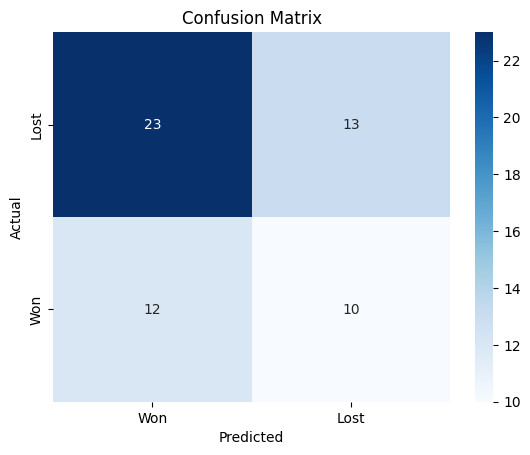

In [127]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Won', 'Lost'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [128]:
class_report = classification_report(y_test, y_pred, target_names=['Lost', 'Won'])
print("\n Classification Report")
print(class_report)


 Classification Report
              precision    recall  f1-score   support

        Lost       0.66      0.64      0.65        36
         Won       0.43      0.45      0.44        22

    accuracy                           0.57        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.57      0.57      0.57        58



## Cricket Dataset (Another Method)

In [129]:
cricket_df = cricket_df.dropna()
cricket_df.tail()

Result     Margin                      Match Home/Away   Ground  \
5165   Lost  3 wickets     Afghanistan v Pakistan      Home    Leeds   
5166   Lost    23 runs  Afghanistan v West Indies      Home    Leeds   
5167   Lost  7 wickets  Afghanistan v West Indies      Home  Lucknow   
5168   Lost    47 runs  Afghanistan v West Indies      Home  Lucknow   
5169   Lost  5 wickets  Afghanistan v West Indies      Home  Lucknow   

      Match Date Match Month  Match Year Match Period  Matches      Country  
5165  2019/06/29         Jun        2019     Jun 2019        1  Afghanistan  
5166  2019/07/04         Jul        2019     Jul 2019        1  Afghanistan  
5167  2019/11/06         Nov        2019     Nov 2019        1  Afghanistan  
5168  2019/11/09         Nov        2019     Nov 2019        1  Afghanistan  
5169  2019/11/11         Nov        2019     Nov 2019        1  Afghanistan

In [130]:
# We do not want to remove duplicates, because eng v aus shoul also appear as aus v eng
#cricket_df = cricket_df.drop_duplicates(subset=['Ground', 'Match Date'])
cricket_df.shape

(8522, 11)

In [131]:
# Splitting the match column into team and opposition
cricket_df['team'] = cricket_df['Match'].apply(lambda x: x.split(' v ')[0])
cricket_df['opposition'] = cricket_df['Match'].apply(lambda x: x.split(' v ')[1])
cricket_df

Result     Margin                      Match Home/Away      Ground  \
0      Lost  5 wickets        Australia v England      Away   Melbourne   
1       Won  6 wickets        England v Australia      Home  Manchester   
2      Lost  5 wickets        England v Australia      Home      Lord's   
3       Won  2 wickets        England v Australia      Home  Birmingham   
4       Won  7 wickets      England v New Zealand      Home     Swansea   
...     ...        ...                        ...       ...         ...   
5165   Lost  3 wickets     Afghanistan v Pakistan      Home       Leeds   
5166   Lost    23 runs  Afghanistan v West Indies      Home       Leeds   
5167   Lost  7 wickets  Afghanistan v West Indies      Home     Lucknow   
5168   Lost    47 runs  Afghanistan v West Indies      Home     Lucknow   
5169   Lost  5 wickets  Afghanistan v West Indies      Home     Lucknow   

      Match Date Match Month  Match Year Match Period  Matches      Country  \
0     1971/01/05         Jan        1971     Jan 1971        1      England   
1     1972/08/24         Aug        1972     Aug 1972        1      England   
2     1972/08/26         Aug        1972     Aug 1972        1      England   
3     1972/08/28         Aug        1972     Aug 1972        1      England   
4     1973/07/18         Jul        1973     Jul 1973        1      England   
...          ...         ...         ...          ...      ...          ...   
5165  2019/06/29         Jun        2019     Jun 2019        1  Afghanistan   
5166  2019/07/04         Jul        2019     Jul 2019        1  Afghanistan   
5167  2019/11/06         Nov        2019     Nov 2019        1  Afghanistan   
5168  2019/11/09         Nov        2019     Nov 2019        1  Afghanistan   
5169  2019/11/11         Nov        2019     Nov 2019        1  Afghanistan   

             team   opposition  
0       Australia      England  
1         England    Australia  
2         England    Australia  
3         England    Australia  
4         England  New Zealand  
...           ...          ...  
5165  Afghanistan     Pakistan  
5166  Afghanistan  West Indies  
5167  Afghanistan  West Indies  
5168  Afghanistan  West Indies  
5169  Afghanistan  West Indies  

[8522 rows x 13 columns]

In [132]:
# Keep only Won/Lost
cricket_df = cricket_df[(cricket_df['Result'] == 'Won') | (cricket_df['Result'] == 'Lost')]
print(cricket_df.shape)

(8522, 13)


In [133]:
# Mapping Lost to 0 and Won to 1
cricket_df['Result'] = cricket_df['Result'].map({'Lost': 0, 'Won': 1})
cricket_df['Home/Away'] = cricket_df['Home/Away'].map({'Away' : 0, 'Home': 1})

In [134]:
# Country filter India
cricket_df = cricket_df[(cricket_df['team'] == 'India')]

In [135]:
cricket_df.Ground

61             Ahmedabad
62             Jalandhar
63               Cuttack
98                  Pune
99               Cuttack
              ...       
4625              Durban
4629         Southampton
4731    Pietermaritzburg
4811           Bengaluru
4848            Hamilton
Name: Ground, Length: 1220, dtype: object

In [136]:
# One Hot encode the opposition column
opposition_encoded = pd.get_dummies(cricket_df['opposition'], prefix='opposition')
print(opposition_encoded)

      opposition_Australia  opposition_Bangladesh  opposition_England  \
61                   False                  False                True   
62                   False                  False                True   
63                   False                  False                True   
98                   False                  False                True   
99                   False                  False                True   
...                    ...                    ...                 ...   
4625                 False                  False               False   
4629                 False                  False               False   
4731                 False                  False               False   
4811                 False                  False               False   
4848                 False                  False               False   

      opposition_Ireland  opposition_Kenya  opposition_Namibia  \
61                 False             False               

In [137]:
# Combine one hot encoded opposition with Home/Away col
X = pd.concat([opposition_encoded, pd.get_dummies(cricket_df['Home/Away'], drop_first=True)], axis=1)
y = cricket_df['Result']

In [138]:
X

opposition_Australia  opposition_Bangladesh  opposition_England  \
61                   False                  False                True   
62                   False                  False                True   
63                   False                  False                True   
98                   False                  False                True   
99                   False                  False                True   
...                    ...                    ...                 ...   
4625                 False                  False               False   
4629                 False                  False               False   
4731                 False                  False               False   
4811                 False                  False               False   
4848                 False                  False               False   

      opposition_Ireland  opposition_Kenya  opposition_Namibia  \
61                 False             False               False   
62                 False             False               False   
63                 False             False               False   
98                 False             False               False   
99                 False             False               False   
...                  ...               ...                 ...   
4625               False              True               False   
4629               False              True               False   
4731               False             False                True   
4811                True             False               False   
4848                True             False               False   

      opposition_Netherlands  opposition_New Zealand  opposition_Pakistan  \
61                     False                   False                False   
62                     False                   False                False   
63                     False                   False                False   
98                     False                   False                False   
99                     False                   False                False   
...                      ...                     ...                  ...   
4625                   False                   False                False   
4629                   False                   False                False   
4731                   False                   False                False   
4811                   False                   False                False   
4848                   False                   False                False   

      opposition_South Africa  opposition_Sri Lanka  opposition_U.A.E.  \
61                      False                 False              False   
62                      False                 False              False   
63                      False                 False              False   
98                      False                 False              False   
99                      False                 False              False   
...                       ...                   ...                ...   
4625                    False                 False              False   
4629                    False                 False              False   
4731                    False                 False              False   
4811                    False                 False              False   
4848                    False                 False              False   

      opposition_West Indies  opposition_Zimbabwe      1  
61                     False                False  False  
62                     False                False  False  
63                     False                False  False  
98                     False                False  False  
99                     False                False  False  
...                      ...                  ...    ...  
4625                   False                False  False  
4629                   False                False 

In [139]:
# Ensure that the column names in X are string
X.columns = X.columns.astype(str)

In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [141]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [142]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

Actual  Prediction
2779       0           0
1956       1           0
838        0           0
2579       1           0
1518       0           0
...      ...         ...
2445       0           0
1939       0           0
992        0           0
2706       1           0
1014       0           0

[244 rows x 2 columns]

In [143]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4549


In [144]:
len(X.columns)

15

In [145]:
new_match = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]     
predicted_probability = nb.predict_proba(new_match)[0][1]
predicted_probability

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.27603905843027426

# Decision Tree

In [146]:
import random

In [147]:
# Set random seed for reproducibility
np.random.seed(42)

In [148]:
# Function to generate random names
def generate_name():
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    name = ''.join(random.choice(consonants) + random.choice(vowels) + random.choice(consonants) for _ in range(random.randint(2,3)))
    return name.capitalize()

In [149]:
# Generate data for the DataFrame
data = {
    'name' : [generate_name() for _ in range(25)],
    'age' : np.random.randint(18, 65, size=25),
    'own_house?': np.random.randint(0,2,size=25),
    'is_employed': np.random.randint(0,2,size=25),
    'is_married': np.random.randint(0,2,size=25),
    'has_existing_loan?': np.random.randint(0,2,size=25),   
}


In [150]:
# Create the dataFrame
df = pd.DataFrame(data)

In [151]:
# Save the dataframe to a csv file
df.to_csv('decision_tree_data.csv', index=False)


In [152]:
df.head()

name  age  own_house?  is_employed  is_married  has_existing_loan?
0  Giwhuqtah   56           1            0           0                   1
1  Sunkunqot   46           1            0           1                   1
2  Qustaxrih   32           1            0           0                   0
3     Kazboz   60           0            0           0                   1
4     Lepfod   25           1            0           1                   0

## Titanic Dataset

In [153]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_csv('./data_pd/tested.xls')
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [155]:
# Drop rows with missing values
# df = df.dropna()

In [156]:
# Define features and target variables
features = ['Pclass','Sex', "Age", "SibSp", "Embarked"]
target = "Survived"

In [157]:
# Encode Categorical features
encoder = LabelEncoder()
for col in features:
    if df[col].dtype == object:
        df[col] = encoder.fit_transform(df[col])

In [158]:
# Scale numeric feature (here Age)
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[["Age"]])

In [159]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  0.298549      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  1.181328      1      0   
2                     Myles, Mr. Thomas Francis    1  2.240662      0      0   
3                              Wirz, Mr. Albert    1 -0.231118      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0 -0.584229      1      1   

    Ticket     Fare Cabin  Embarked  
0   330911   7.8292   NaN         1  
1   363272   7.0000   NaN         2  
2   240276   9.6875   NaN         1  
3   315154   8.6625   NaN         2  
4  3101298  12.2875   NaN         2

In [160]:
# Separate feature and Target
X = df[features]
y = df[target]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)    # 80% trainig and 20% test

In [162]:
# Create decision tree classifier
model = DecisionTreeClassifier()

In [163]:
# Train the model 
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [164]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [165]:
# Print valrious classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

Confusion Matrix:
 [[58  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [166]:
# Print the importance of each feature
print(" Feature Importances:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.2f}")

 Feature Importances:
Pclass: 0.00
Sex: 1.00
Age: 0.00
SibSp: 0.00
Embarked: 0.00


    - Save the tree as an image

    

    - option 1  
    - Create a dot file and then convert manually to png format
    - Save the tree as a DOT file
    - pip install export_graphviz

In [167]:
# with open ("titanic_tree.dot", "w") as f:
#     export_graphviz(model, out_file=f, feature_names=features, filled=True)

# You will have to sa dot -Tpng titanic_tree.dot -o titanic_tree.png to convert
# OR ...
# Search for "dot file editor" in google and open one ->
# Paste the .dot file contents in that editor


    - Option 2
    - Directly create a png file

In [168]:
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


In [169]:
dot_df = StringIO()
export_graphviz(model, out_file=dot_df, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_df.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

    - Option 3
    - Also try to print it within the code itself

In [170]:
import graphviz

In [171]:
dot_data = export_graphviz(model, out_file=None, feature_names=features, class_names=['0','1'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render ("decision-tree")
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Bank dataset

In [172]:
df = pd.read_csv('./data_pd/Bank Customer Churn Prediction.csv')
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [173]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [174]:
features = ['country', 'gender']

In [175]:
# Encode Categorical features
encoder = LabelEncoder()
for col in features:
    if df[col].dtype == object:
        df[col] = encoder.fit_transform(df[col])

In [176]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       0   42       2       0.00   
1        15647311           608        2       0   41       1   83807.86   
2        15619304           502        0       0   42       8  159660.80   
3        15701354           699        0       0   39       1       0.00   
4        15737888           850        2       0   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       1   39       5       0.00   
9996     15569892           516        0       1   35      10   57369.61   
9997     15584532           709        0       0   36       7       0.00   
9998     15682355           772        1       1   42       3   75075.31   
9999     15628319           792        0       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [ ]:
# Scale numeric feature (here Age)
scaler = StandardScaler()
df['balance'] = scaler.fit_transform(df[["balance"]])
df['estimated_salary'] = scaler.fit_transform(df[["estimated_salary"]])
df

customer_id  credit_score  country  gender  age  tenure   balance  \
0        15634602           619        0       0   42       2 -1.225848   
1        15647311           608        2       0   41       1  0.117350   
2        15619304           502        0       0   42       8  1.333053   
3        15701354           699        0       0   39       1 -1.225848   
4        15737888           850        2       0   43       2  0.785728   
...           ...           ...      ...     ...  ...     ...       ...   
9995     15606229           771        0       1   39       5 -1.225848   
9996     15569892           516        0       1   35      10 -0.306379   
9997     15584532           709        0       0   36       7 -1.225848   
9998     15682355           772        1       1   42       3 -0.022608   
9999     15628319           792        0       0   28       4  0.859965   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1          0.021886      1  
1                   1            0              1          0.216534      0  
2                   3            1              0          0.240687      1  
3                   2            0              0         -0.108918      0  
4                   1            1              1         -0.365276      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0         -0.066419      0  
9996                1            1              1          0.027988      0  
9997                1            0              1         -1.008643      1  
9998                2            1              0         -0.125231      1  
9999                1            1              0         -1.076370      0  

[10000 rows x 12 columns]

In [178]:
X = df.drop(columns=['customer_id', 'credit_score', 'churn'])
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
model = DecisionTreeClassifier()

In [181]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [182]:
# Print valrious classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Classification Report:", metrics.classification_report(y_test, y_pred))

Confusion Matrix:
 [[1389  218]
 [ 174  219]]
Accuracy: 0.804
Precision: 0.5011441647597255
Recall: 0.5572519083969466
F1-score: 0.5277108433734939
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1607
           1       0.50      0.56      0.53       393

    accuracy                           0.80      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.81      0.80      0.81      2000



In [183]:
# Print the importance of each feature
print(" Feature Importances:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.2f}")

 Feature Importances:
country: 0.04
gender: 0.03


[Text(0.6978272727875636, 0.98, 'x[2] <= 44.5\ngini = 0.327\nsamples = 8000\nvalue = [6356, 1644]'),
 Text(0.532826040340266, 0.94, 'x[5] <= 2.5\ngini = 0.228\nsamples = 6130\nvalue = [5324.0, 806.0]'),
 Text(0.6153266565639148, 0.96, 'True  '),
 Text(0.4049842821519525, 0.9, 'x[5] <= 1.5\ngini = 0.204\nsamples = 5987\nvalue = [5296, 691]'),
 Text(0.2542080061544992, 0.86, 'x[2] <= 38.5\ngini = 0.3\nsamples = 2952\nvalue = [2410, 542]'),
 Text(0.13079681310130165, 0.82, 'x[0] <= 0.5\ngini = 0.236\nsamples = 2127\nvalue = [1837, 290]'),
 Text(0.0525290039615167, 0.78, 'x[4] <= -0.303\ngini = 0.174\nsamples = 1110\nvalue = [1003, 107]'),
 Text(0.010979060554612338, 0.74, 'x[3] <= 1.5\ngini = 0.309\nsamples = 241\nvalue = [195, 46]'),
 Text(0.0018109790605546124, 0.7, 'x[4] <= -0.911\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.0009054895302773062, 0.66, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.0027164685908319186, 0.66, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue

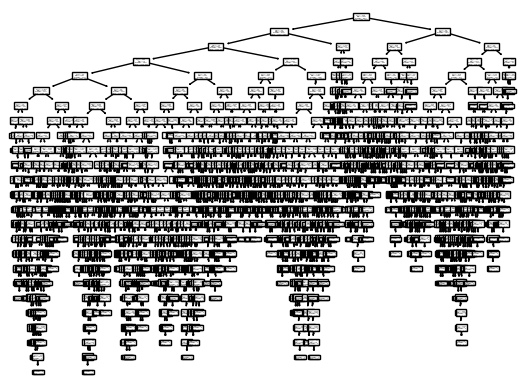

In [184]:
from sklearn import tree
tree.plot_tree(model)

In [185]:
tree.export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[2] <= 44.5\\ngini = 0.327\\nsamples = 8000\\nvalue = [6356, 1644]"] ;\n1 [label="x[5] <= 2.5\\ngini = 0.228\\nsamples = 6130\\nvalue = [5324.0, 806.0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[5] <= 1.5\\ngini = 0.204\\nsamples = 5987\\nvalue = [5296, 691]"] ;\n1 -> 2 ;\n3 [label="x[2] <= 38.5\\ngini = 0.3\\nsamples = 2952\\nvalue = [2410, 542]"] ;\n2 -> 3 ;\n4 [label="x[0] <= 0.5\\ngini = 0.236\\nsamples = 2127\\nvalue = [1837, 290]"] ;\n3 -> 4 ;\n5 [label="x[4] <= -0.303\\ngini = 0.174\\nsamples = 1110\\nvalue = [1003, 107]"] ;\n4 -> 5 ;\n6 [label="x[3] <= 1.5\\ngini = 0.309\\nsamples = 241\\nvalue = [195, 46]"] ;\n5 -> 6 ;\n7 [label="x[4] <= -0.911\\ngini = 0.061\\nsamples = 32\\nvalue = [31, 1]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 30\\nvalue = [30, 0]"] ;\n7 -> 8 ;\n9 [label="x[3] <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] 

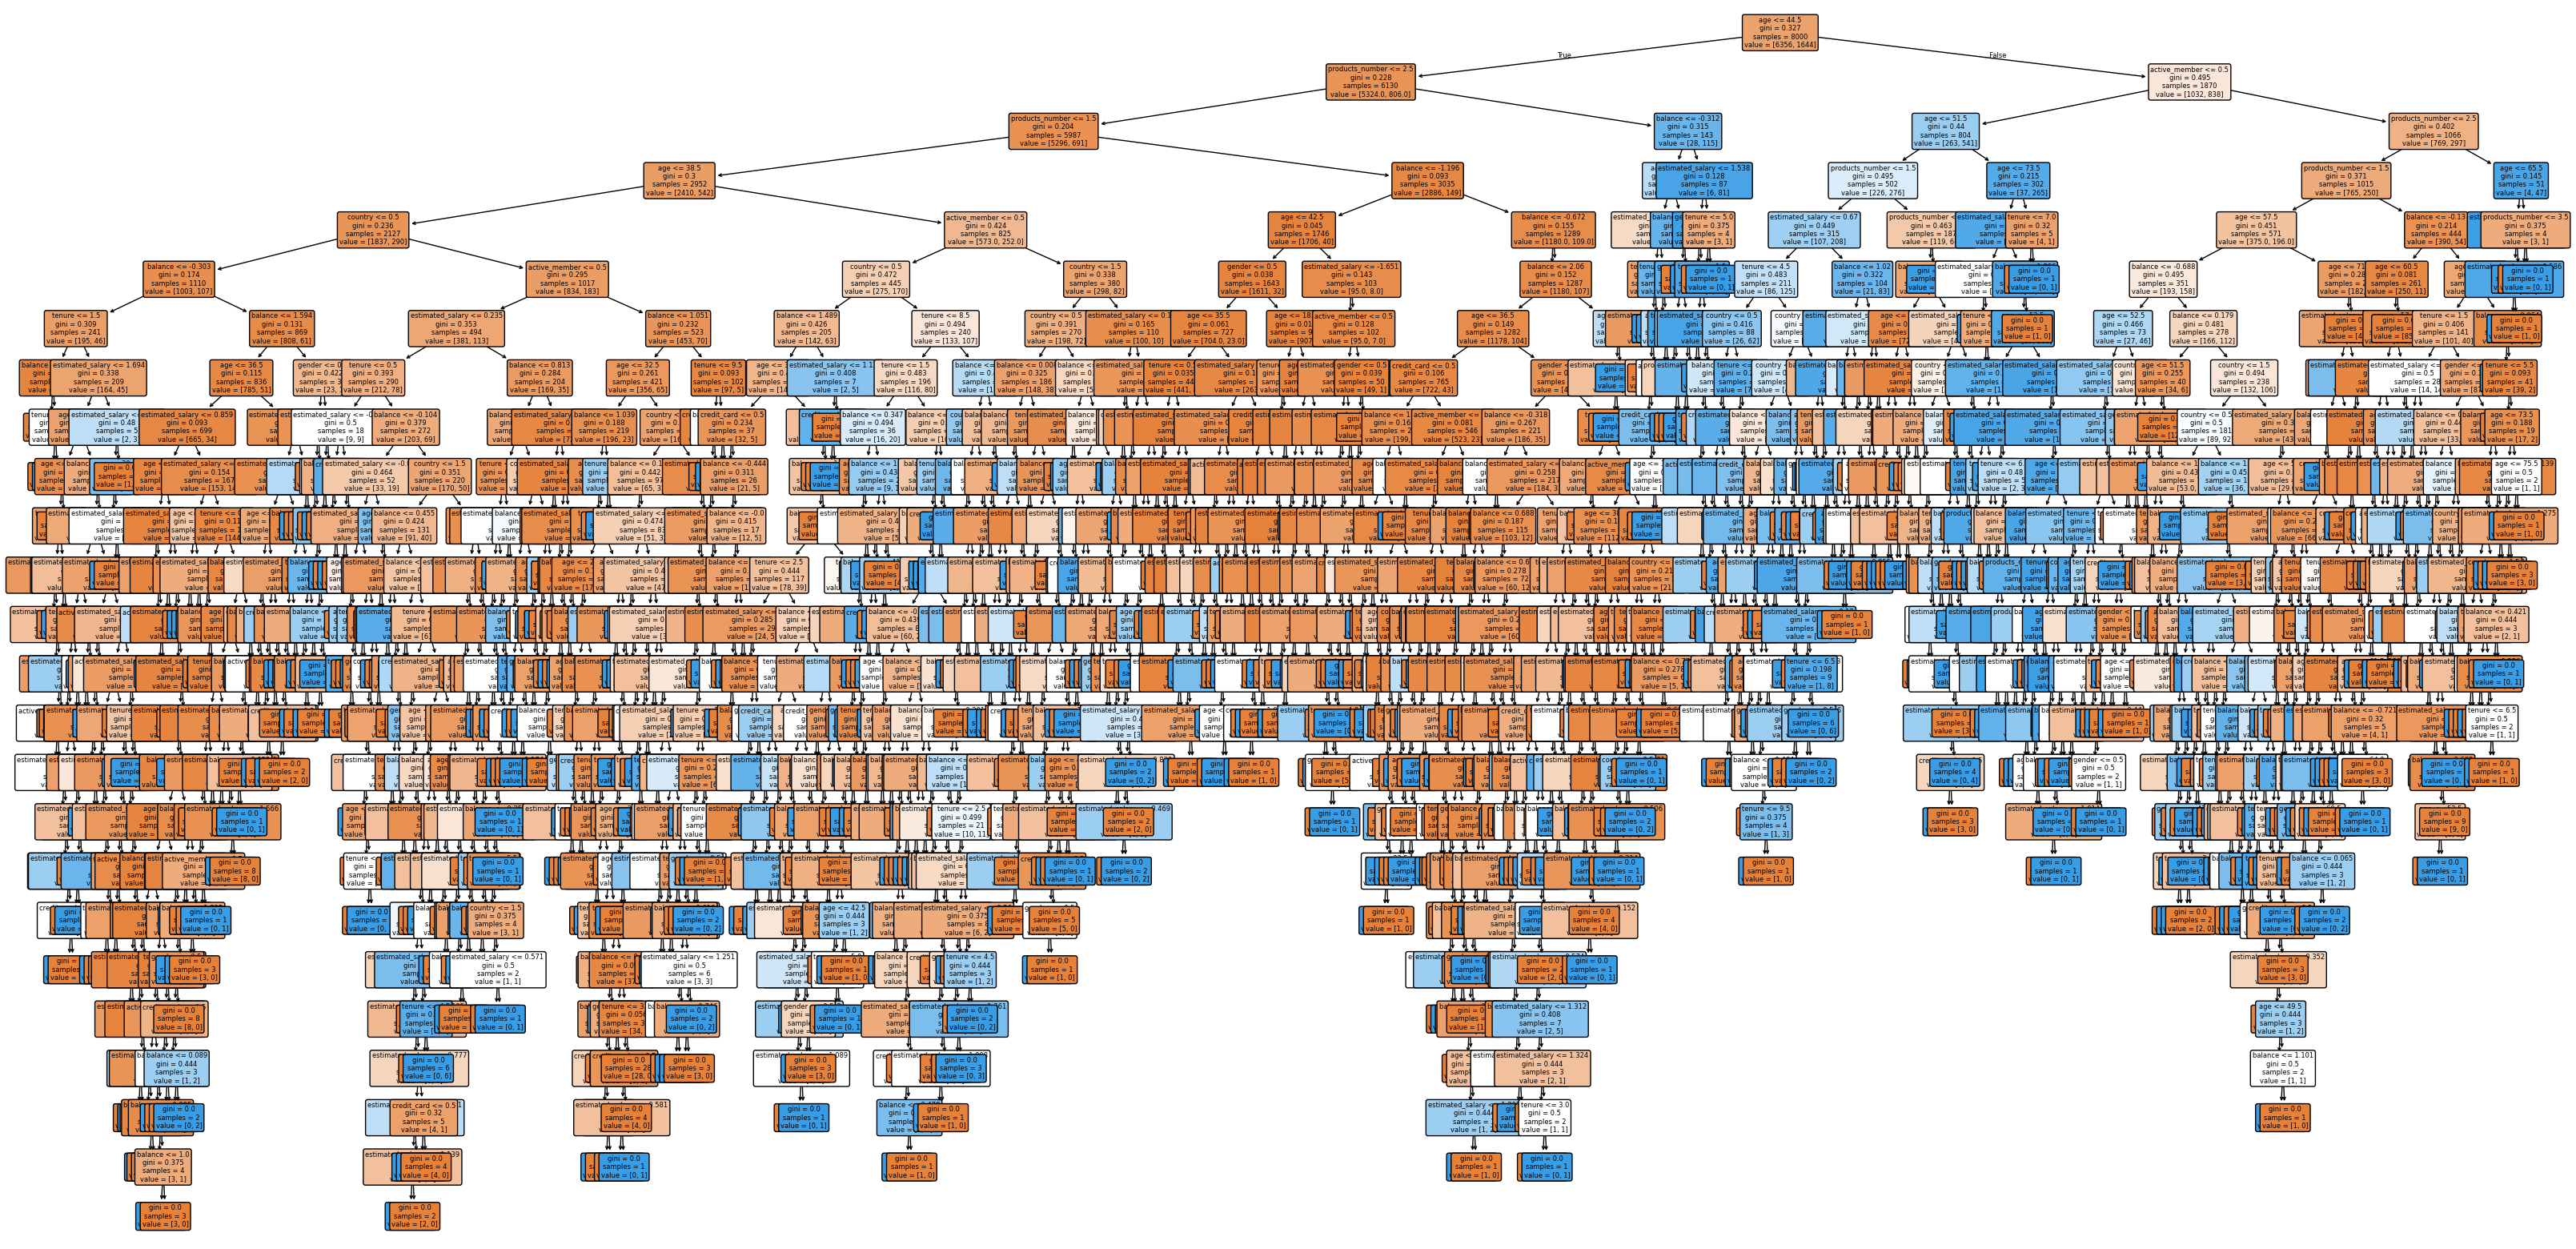

In [186]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

## Fraud dataset

In [188]:
df = pd.read_csv('./data_pd/onlinefraud.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [191]:
models = {
    'naive_bayes': GaussianNB(),
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier()
}

In [192]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [193]:
features = ['type', 'nameOrig', 'nameDest']
scalers = ['amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = ['isFraud']

In [ ]:
# Encode Categorical features
encoder = LabelEncoder()
for col in features:
    if df[col].dtype == object:
        df[col] = encoder.fit_transform(df[col])
df

step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3     9839.64    757869      170136.00       160296.36   
1           1     3     1864.28   2188998       21249.00        19384.72   
2           1     4      181.00   1002156         181.00            0.00   
3           1     1      181.00   5828262         181.00            0.00   
4           1     3    11668.14   3445981       41554.00        29885.86   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13            0.00   
6362616   743     4  6311409.28   1737278     6311409.28            0.00   
6362617   743     1  6311409.28    533958     6311409.28            0.00   
6362618   743     4   850002.52   2252932      850002.52            0.00   
6362619   743     1   850002.52    919229      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0         1662094            0.00            0.00        0               0  
1         1733924            0.00            0.00        0               0  
2          439685            0.00            0.00        1               0  
3          391696        21182.00            0.00        1               0  
4          828919            0.00            0.00        0               0  
...           ...             ...             ...      ...             ...  
6362615    505863            0.00       339682.13        1               0  
6362616    260949            0.00            0.00        1               0  
6362617    108224        68488.84      6379898.11        1               0  
6362618    319713            0.00            0.00        1               0  
6362619    534595      6510099.11      7360101.63        1               0  

[6362620 rows x 11 columns]

In [197]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [198]:
df.dtypes

step                int64
type                int32
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [199]:
# Scale numeric feature (here Age)
scaler = StandardScaler()
for col in scalers:
    df[col] = scaler.fit_transform(df[[col]])
df

step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3  -0.281560    757869      170136.00       -0.237622   
1           1     3  -0.294767   2188998       21249.00       -0.285812   
2           1     4  -0.297555   1002156         181.00       -0.292442   
3           1     1  -0.297555   5828262         181.00       -0.292442   
4           1     3  -0.278532   3445981       41554.00       -0.282221   
...       ...   ...        ...       ...            ...             ...   
6362615   743     1   0.264665   5651847      339682.13       -0.292442   
6362616   743     4  10.153953   1737278     6311409.28       -0.292442   
6362617   743     1  10.153953    533958     6311409.28       -0.292442   
6362618   743     4   1.109765   2252932      850002.52       -0.292442   
6362619   743     1   1.109765    919229      850002.52       -0.292442   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0         1662094       -0.323814       -0.333411        0               0  
1         1733924       -0.323814       -0.333411        0               0  
2          439685       -0.323814       -0.333411        1               0  
3          391696       -0.317582       -0.333411        1               0  
4          828919       -0.323814       -0.333411        0               0  
...           ...             ...             ...      ...             ...  
6362615    505863       -0.323814       -0.240959        1               0  
6362616    260949       -0.323814       -0.333411        1               0  
6362617    108224       -0.303665        1.403027        1               0  
6362618    319713       -0.323814       -0.333411        1               0  
6362619    534595        1.591383        1.669812        1               0  

[6362620 rows x 11 columns]

In [200]:
X = df.drop(columns=['isFraud'], axis=1)
y = df['isFraud']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print valrious classification metrics
    print("Model:\n", model_name)
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1-score:", metrics.f1_score(y_test, y_pred))
    print("Classification Report:", metrics.classification_report(y_test, y_pred))
    
    print('='*50)

Model:
 naive_bayes
Confusion Matrix:
 [[1258327   12577]
 [   1603      17]]
Accuracy: 0.9888567916990171
Precision: 0.0013498491345084961
Recall: 0.010493827160493827
F1-score: 0.002392007879555368
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270904
           1       0.00      0.01      0.00      1620

    accuracy                           0.99   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      0.99      0.99   1272524



c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:
 logistic_regression
Confusion Matrix:
 [[1270737     167]
 [   1620       0]]
Accuracy: 0.9985957042853416
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Model:
 decision_tree
Confusion Matrix:
 [[1270730     174]
 [    210    1410]]
Accuracy: 0.9996982375185065
Precision: 0.8901515151515151
Recall: 0.8703703703703703
F1-score: 0.8801498127340824
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.87      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weig

In [204]:
# Print the importance of each feature
print(" Feature Importances:")
for feature, importance in zip(features, models['decision_tree'].feature_importances_):
    print(f"{feature}: {importance:.2f}")

 Feature Importances:
type: 0.06
nameOrig: 0.03
nameDest: 0.14


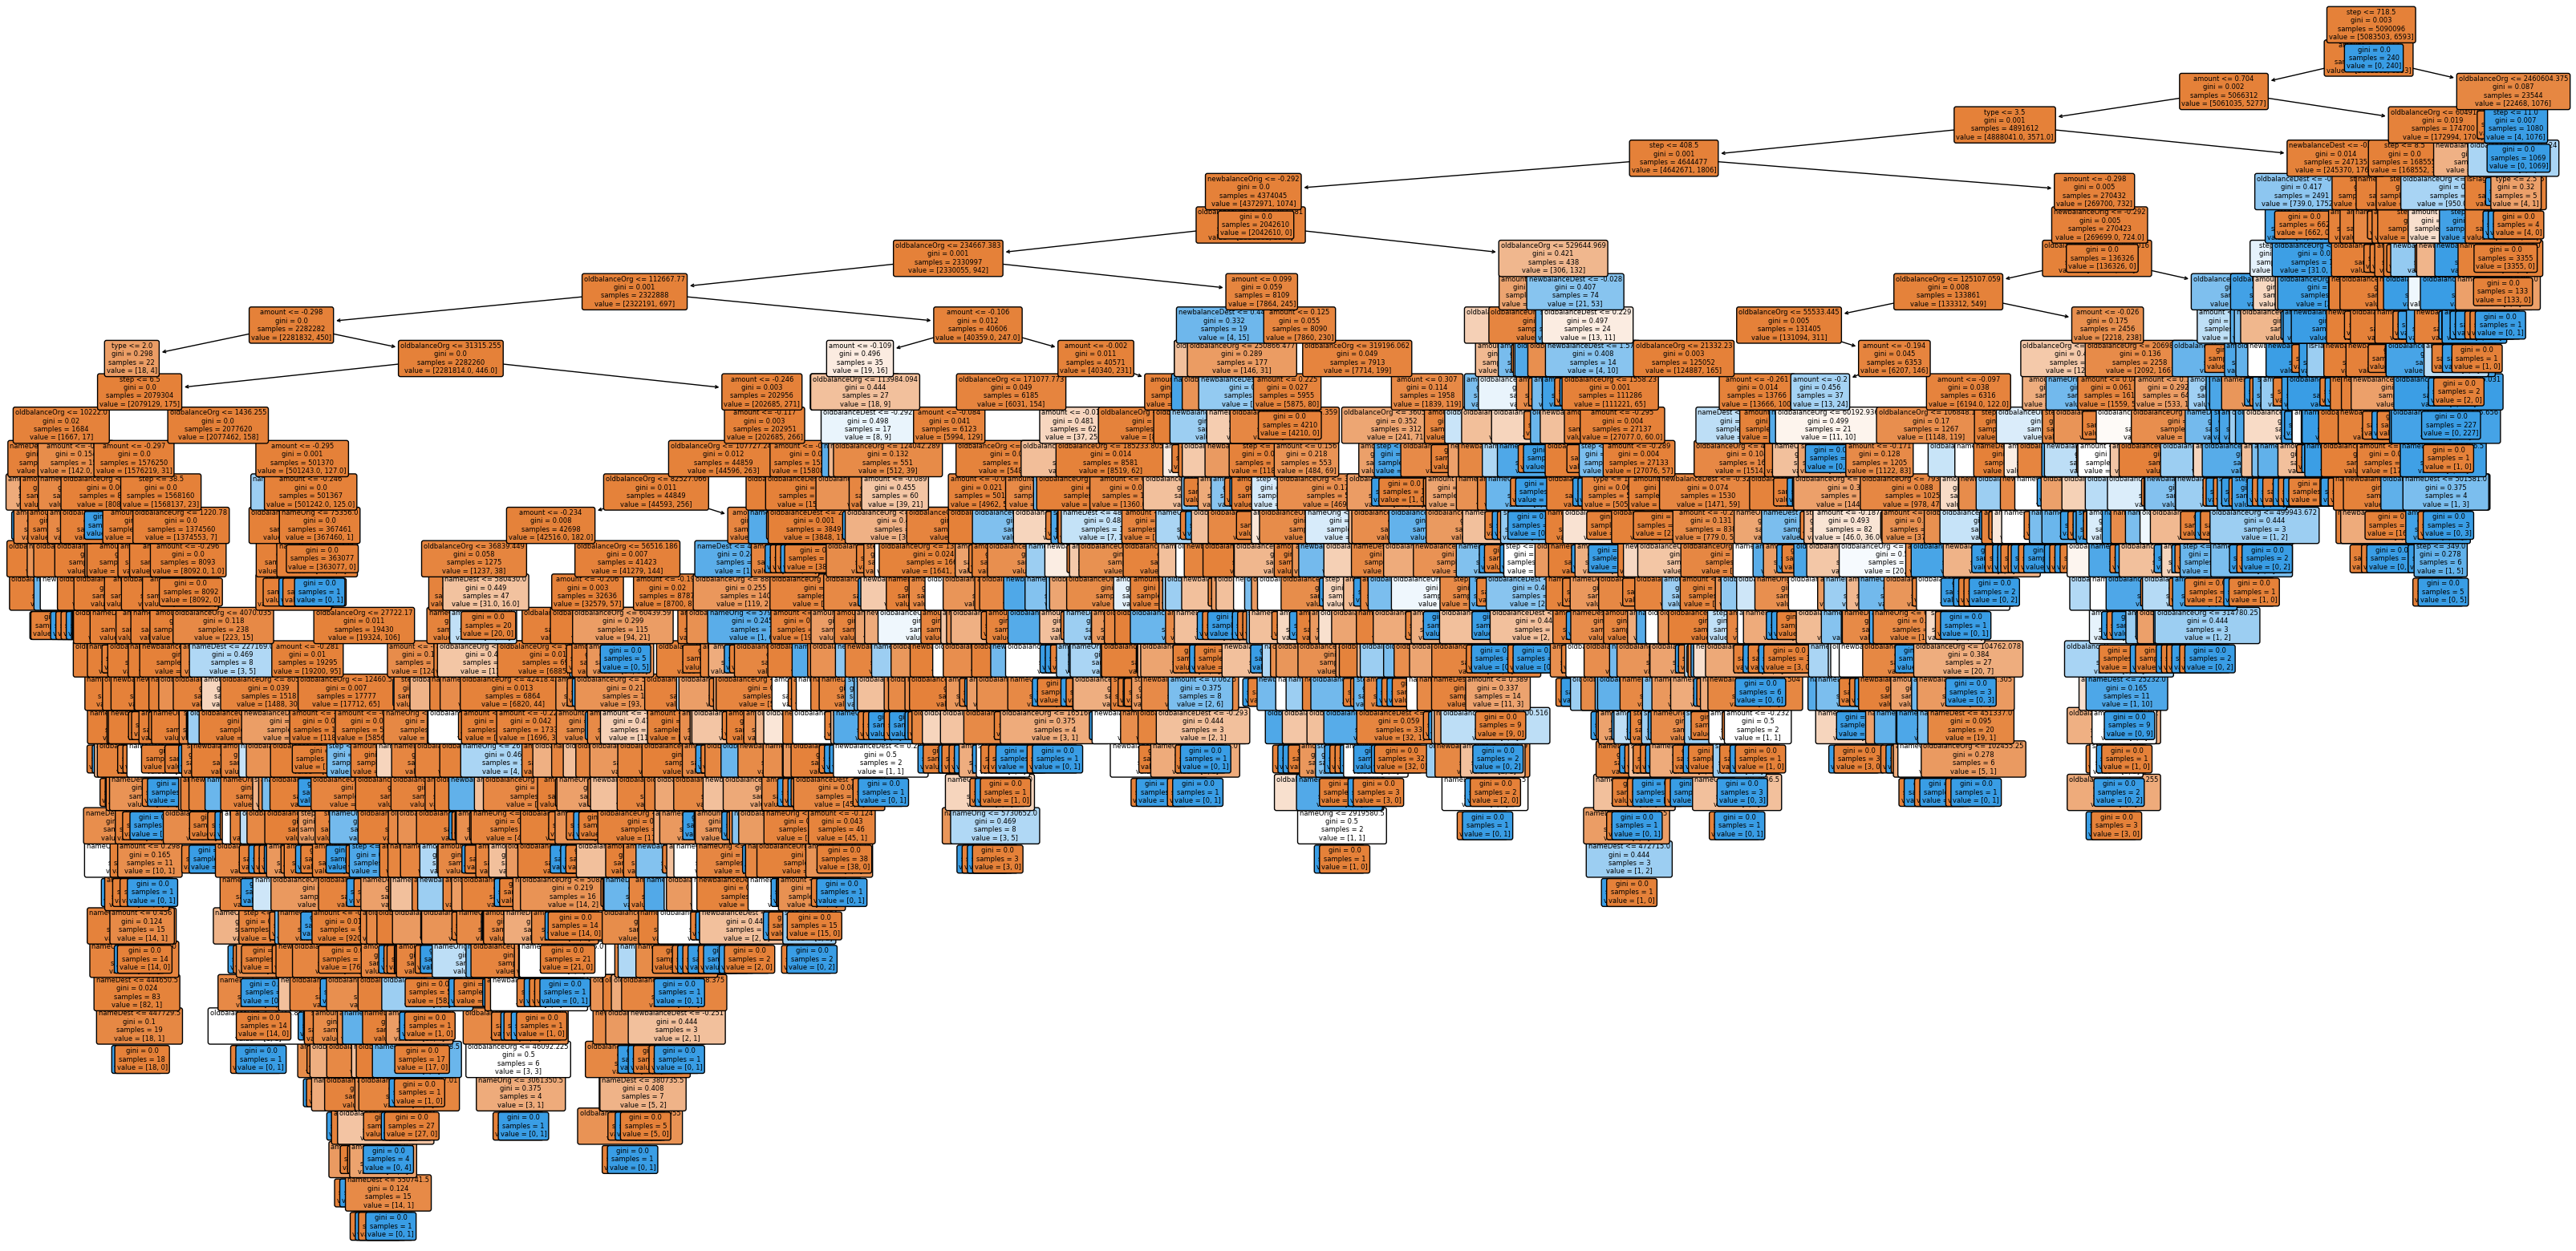

In [206]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(models['decision_tree'], feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()